## This creates the mountains figure in AMOC paper.

In [2]:
import xarray as xr 
import matplotlib.pyplot as plt 
import os

In [89]:
# prepare data
adr_home = os.path.join('C:','Users','nd20983','docs','Simulations','data','rawdata')
filenames = ['ser_get.nc', 'ser_sco.nc', 'ser_robo.nc']
ds = []
for filename in filenames:
    adr_in = os.path.join(adr_home, filename)
    file = xr.open_dataset('../../Simulations/data/rawdata/'+filename)
    ds.append(file)
# coordinates processing for robo
ds[2] = ds[2].assign_coords(
    {
        "longitude": robo.longitude_5,
        "latitude": robo.latitude_5
    }
)
get = ds[0].landhighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
sco = ds[1].landhighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
robo = ds[2].landhighorig.sel(latitude_5=slice(80, 0), longitude_5=slice(180, 320))
# print(get)
# print(sco)
# print(robo)

0
1
2


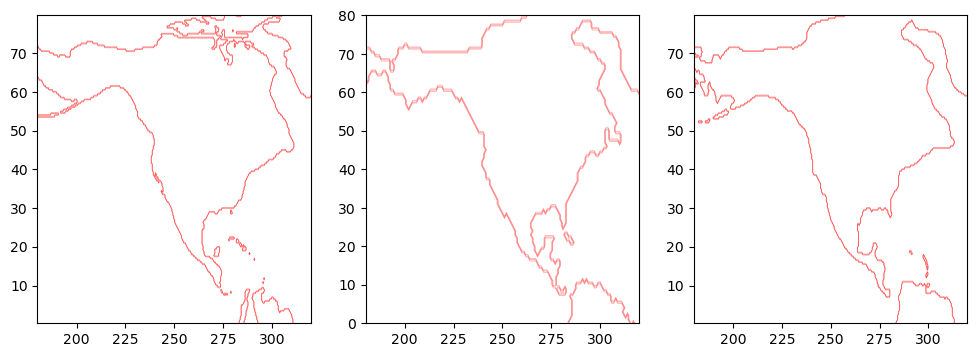

In [ ]:
fig = plt.figure(figsize=(12,4))
# plot land-sea-mask
for index, (label, geog) in enumerate({'get':get, 'sco':sco, 'robo':robo}.items()):
    print(index)
    ax = fig.add_subplot(1, 3, index+1)
    lsm = ax.contour(geog.longitude, geog.latitude, geog, colors='r',
                                   linewidths=0.1, extend='both')

In [77]:
for index, geog in {'get':get, 'sco':sco, 'robo':robo}.items():
    print(geog)

<xarray.DataArray 'landhighorig' (latitude: 160, longitude: 281)> Size: 180kB
[44960 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 1kB 180.0 180.5 181.0 ... 319.0 319.5 320.0
  * latitude   (latitude) float32 640B 79.75 79.25 78.75 ... 1.25 0.75 0.25
Attributes:
    source:      
    name:       landhighorig
    title:      Raw land sea mask (Unmodified)
    long_name:  Raw land sea mask (Unmodified)
    units:      0-1
    valid_min:  0.0
    valid_max:  1.0
<xarray.DataArray 'landhighorig' (latitude: 81, longitude: 141)> Size: 46kB
[11421 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 564B 180.0 181.0 182.0 ... 318.0 319.0 320.0
  * latitude   (latitude) float32 324B 80.0 79.0 78.0 77.0 ... 3.0 2.0 1.0 0.0
Attributes:
    source:      
    name:       landhighorig
    title:      Raw land sea mask (Unmodified)
    long_name:  Raw land sea mask (Unmodified)
    units:      0-1
    valid_min:  0.0
    valid_max:  1.0
<xarray.Data